In [2]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

seed=2020
import random
np.random.seed(seed)
random.seed(seed)

plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
plt.close('all')
print("rready")

rready


In [19]:
#数据预处理

def preprocess(data):
    #将非数映射成数字
    for title in data.columns:
        if data[title].dtype=='object':
            encoder=LabelEncoder()
            data[title]=encoder.fit_transform(data[title])
    #去均值和方差归一化
    ss=StandardScaler()
    X=data.drop('好瓜',axis=1)
    Y=data['好瓜']
    X=ss.fit_transform(X)
    x,y = np.array(X),np.array(Y).reshape(Y.shape[0],1)
    return x,y 

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def d_sigmoid(x):
    return x*(1-x)

In [24]:
'''
@function 标准BP算法
@params dim for隐藏层数量 eta for学习率
@return weight&bias w1,w2,b1,b2
'''

def standard_BP(x,y,dim=10,eta=0.8,max_iter=500):
    n_samples= 1
    w1=np.zeros((x.shape[1],dim))
    b1=np.zeros((n_samples,dim))
    w2=np.zeros((dim,1))
    b2=np.zeros((n_samples,1))
    losslist=[]#记录损失的均值，用于画图
    for ite in range(max_iter):
        loss_per_ite = []#记录每一个样本的损失，用于画图
        for m in range(x.shape[0]):#遍历每个样本
            xi,yi=x[m,:],y[m,:]#序号为m的样本
            xi,yi = xi.reshape(1,xi.shape[0]),yi.reshape(1,yi.shape[0])
            # 向前传播
            u1 = np.dot(xi,w1)+b1 #输入层to隐藏层，隐藏层输入
            out1=sigmoid(u1)#激活函数，隐藏层输出
            u2=np.dot(out1,w2)+b2
            out2=sigmoid(u2)#输出层输出
            loss = np.square(yi-out2)/2
            loss_per_ite.append(loss)
            print('iter:',ite,'loss:',loss)

            #反向传播
            #标准BP
            #@note 下面的计算过程把链式法则拆开了，对照笔记里的公式理解
            d_out2 = -(yi-out2)#均方误差的导数
            d_u2 = d_out2*d_sigmoid(out2)#相当于公式推导里面的gi，中间式
            d_w2 = np.dot(np.transpose(out1),d_u2)#权重
            d_b2 = d_u2#bias

            d_out1 = np.dot(d_u2,np.transpose(w2))
            d_u1 = d_out1*d_sigmoid(out1)
            d_w1 = np.dot(np.transpose(xi),d_u1)
            d_b1 = d_u1
             ##更新
            w1 = w1 - eta*d_w1
            w2 = w2 - eta*d_w2
            b1 = b1 - eta*d_b1 
            b2 = b2 - eta*d_b2   
        losslist.append(np.mean(loss_per_ite))#保存本次循环的所有样本损失的均值
    #Loss可视化
    plt.figure()
    plt.plot([i+1 for i in range(max_iter)],losslist)
    plt.legend(['standard BP'])
    plt.xlabel('iteration')
    plt.ylabel('loss')
    plt.show()
    return w1,w2,b1,b2

3.23788481e-06]]
iter: 464 loss: [[3.71928407e-10]]
iter: 464 loss: [[1.42198224e-06]]
iter: 464 loss: [[2.1923837e-10]]
iter: 464 loss: [[3.72027344e-05]]
iter: 464 loss: [[0.00031934]]
iter: 464 loss: [[0.00031435]]
iter: 464 loss: [[0.00037793]]
iter: 464 loss: [[5.96140712e-06]]
iter: 465 loss: [[8.05613622e-06]]
iter: 465 loss: [[1.53136003e-05]]
iter: 465 loss: [[3.17036387e-05]]
iter: 465 loss: [[0.00047758]]
iter: 465 loss: [[0.00049402]]
iter: 465 loss: [[0.49997578]]
iter: 465 loss: [[0.49997923]]
iter: 465 loss: [[0.00095421]]
iter: 465 loss: [[3.22133236e-06]]
iter: 465 loss: [[3.69723838e-10]]
iter: 465 loss: [[1.41780697e-06]]
iter: 465 loss: [[2.17833792e-10]]
iter: 465 loss: [[3.70952017e-05]]
iter: 465 loss: [[0.00031839]]
iter: 465 loss: [[0.0003134]]
iter: 465 loss: [[0.0003768]]
iter: 465 loss: [[5.93809939e-06]]
iter: 466 loss: [[8.03103071e-06]]
iter: 466 loss: [[1.52690652e-05]]
iter: 466 loss: [[3.16098566e-05]]
iter: 466 loss: [[0.0004762]]
iter: 466 loss: [[0.

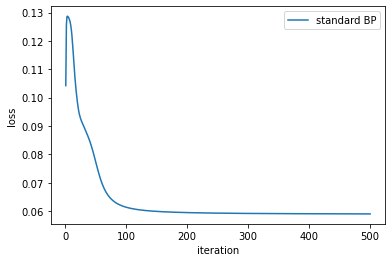

In [25]:
def main():
    data = pd.read_table('watermelon30.txt',delimiter=',')
    data.drop('编号',axis=1,inplace=True)
    x,y = preprocess(data)
    dim = 10
#    _,_,_,_ = accumulate_BP(x,y,dim)
    w1,w2,b1,b2 = standard_BP(x,y,dim)
    #测试
    u1 = np.dot(x,w1)+b1
    out1 = sigmoid(u1)
    u2 = np.dot(out1,w2)+b2
    out2 = sigmoid(u2)  
    y_pred = np.round(out2)
    result = pd.DataFrame(np.hstack((y,y_pred)),columns=['真值','预测'] )     
    result.to_excel('result_numpy.xlsx',index=False)

if __name__=='__main__':
    main()

refer: [blog](https://blog.csdn.net/qq_36937684/article/details/105333895?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522160626824619725225032562%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fall.%2522%257D&request_id=160626824619725225032562&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_v2~rank_v28-14-105333895.pc_search_result_no_baidu_js&utm_term=%E6%A0%87%E5%87%86bp)